In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing Dataset

In [2]:
train_df = pd.read_csv('/content/train.csv')

In [3]:
test_df = pd.read_csv('/content/test.csv')

Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [4]:
df = pd.concat([train_df, test_df])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df = df.drop('User_ID', axis=1)

In [8]:
df.sample(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
446964,P00295942,M,26-35,20,B,1,0,2,5.0,15.0,9733.0
441652,P00158542,F,36-45,2,C,3,0,5,6.0,13.0,7165.0
163962,P00042942,M,18-25,14,B,3,0,1,15.0,NaN,19289.0


Encoding in Gender Feature

In [9]:
df.Gender=df.Gender.map({'F': 0, 'M': 1})

Feature Engineering in Age Feature

In [10]:
df.Age = df.Age.map({'0-17': 1, '55+': 7, '26-35': 3, '46-50': 5, '51-55': 6, '36-45': 4, '18-25': 2})

In [11]:
df.sample(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
413551,P00117942,1,4,7,C,3,0,5,15.0,NaN,6935.0
18199,P00241642,1,3,6,B,1,0,1,2.0,11.0,NaN
60460,P00287442,1,3,2,A,3,0,8,NaN,NaN,NaN


Feature Engineering in City Categorical Feature

In [12]:
df_cities = pd.get_dummies(df.City_Category, drop_first=True)

In [13]:
df = pd.concat([df, df_cities], axis=1)
df = df.drop('City_Category', axis=1)

In [14]:
df.sample(3)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
58277,P00328042,0,3,1,0,1,8,14.0,NaN,9945.0,0,1
395322,P0095842,1,3,0,1,1,3,4.0,12.0,8389.0,1,0
3091,P00130742,1,3,2,0,1,1,14.0,17.0,15218.0,0,0


Handling Missing Values

In [15]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [16]:
df.Product_Category_2 = df.Product_Category_2.fillna(df.Product_Category_2.mode()[0])

In [17]:
df.Product_Category_3 = df.Product_Category_3.fillna(df.Product_Category_3.mode()[0])

In [18]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [19]:
df.Stay_In_Current_City_Years .unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [20]:
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.str.replace('+', '')

<ipython-input-20-655872a75fe1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.str.replace('+', '')


In [21]:
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.astype('int')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 67.3+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

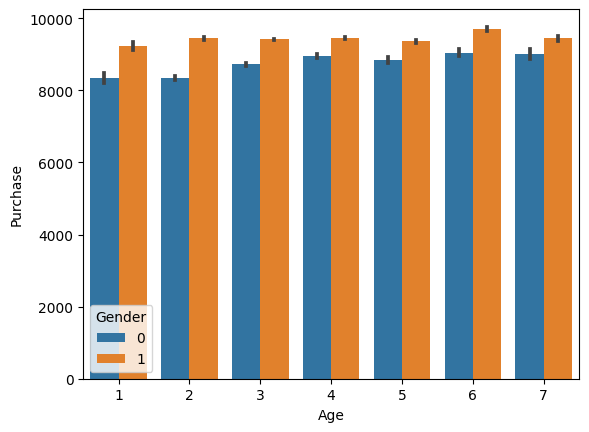

In [25]:
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)

Male Purchase more in Respect to Female 😂

<Axes: xlabel='Occupation', ylabel='Purchase'>

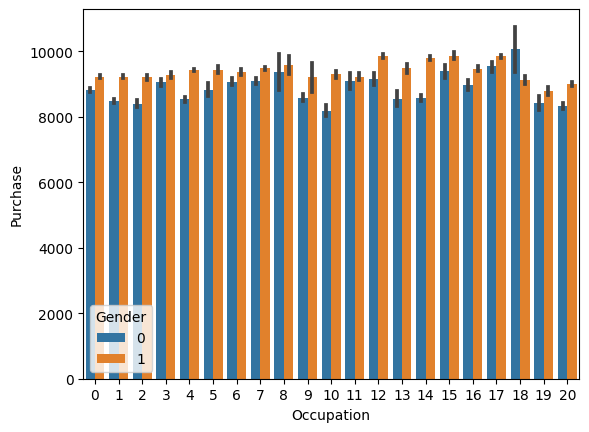

In [26]:
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


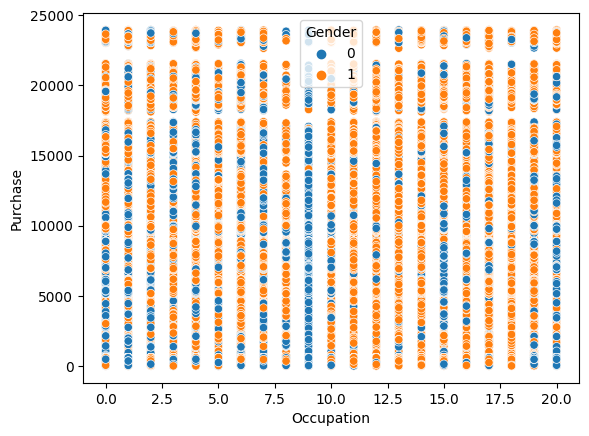

In [29]:
sns.scatterplot(x='Occupation', y='Purchase', hue='Gender', data=df)

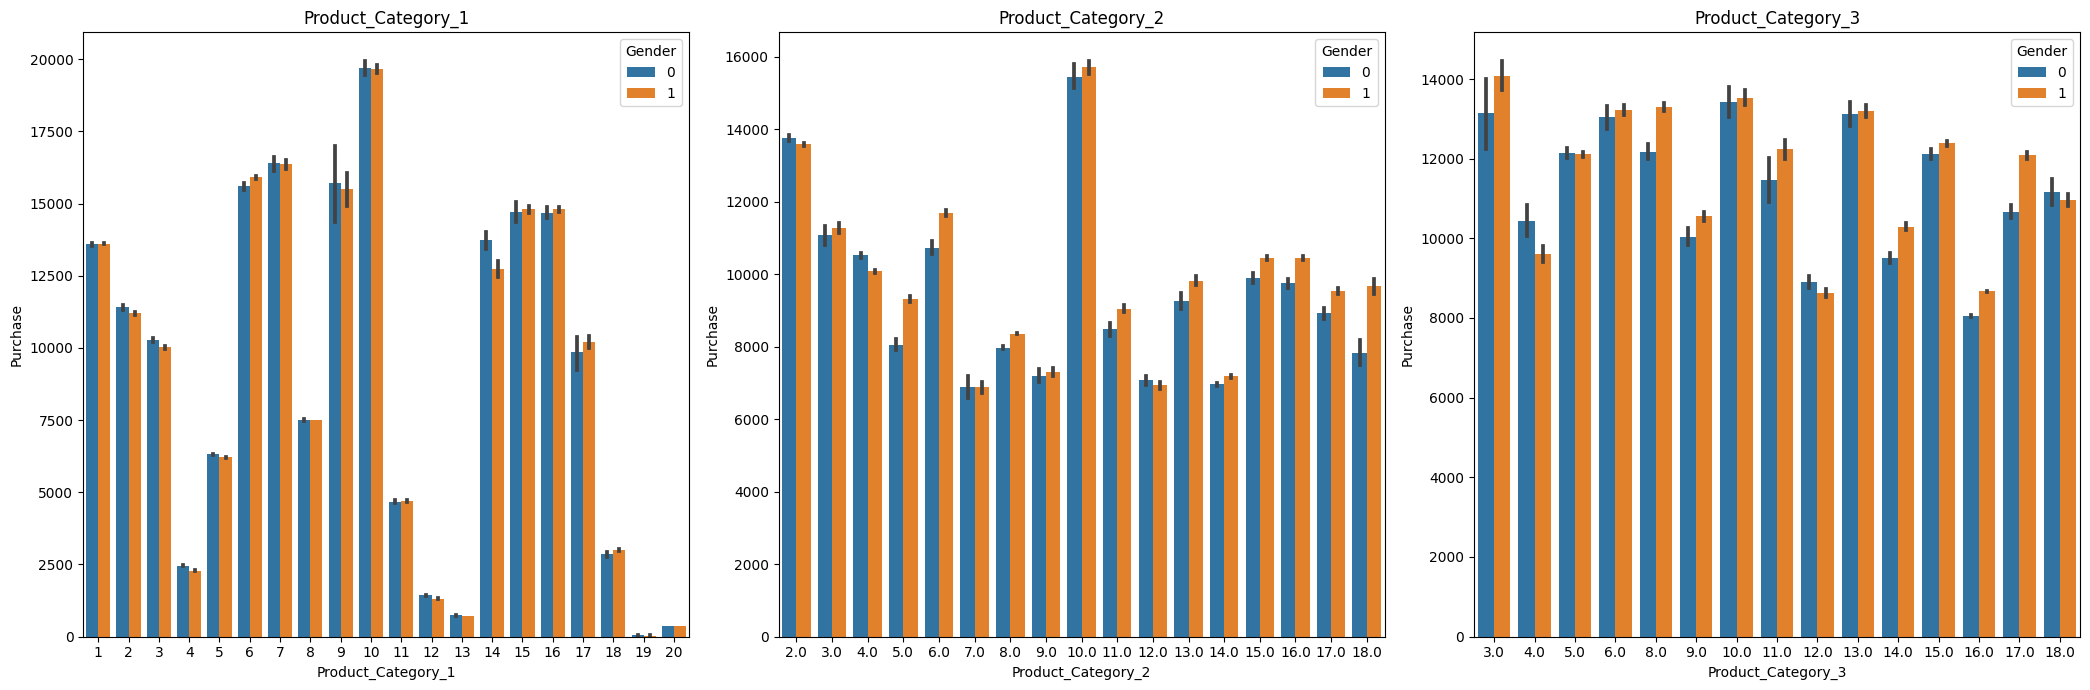

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))

# Bar plot for Product_Category_1
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df, ax=axes[0])
axes[0].set_title('Product_Category_1')

# Bar plot for Product_Category_2
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df, ax=axes[1])
axes[1].set_title('Product_Category_2')

# Bar plot for Product_Category_3
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df, ax=axes[2])
axes[2].set_title('Product_Category_3')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

##### Feature Scaling

In [74]:
df_test = df[df.Purchase.isnull()]
df_train = df[~df.Purchase.isnull()]

In [75]:
X = df_train.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 10, 11]]

In [76]:
y = df_train.iloc[:, [9]]

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [91]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [94]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [92]:
X_train.shape, X_test.shape

((440054, 10), (110014, 10))

In [82]:
X.shape

(550068, 10)

In [83]:
y.shape

(550068, 1)

In [96]:
y_pred = model.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score

model.score(X_train, y_train)

0.13183689094636353